<a href="https://colab.research.google.com/github/DaniilPochukaev/Portfolio-python/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BF%D0%BE_%D0%BA%D1%83%D1%80%D1%81%D1%83_%22Python_%D0%BA%D0%B0%D0%BA_%D0%B8%D0%BD%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%BD%D1%8B%D0%B9%22_(%D0%95%D0%A3%D0%A1%D0%9F%D0%B1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
url = 'https://en.wikipedia.org/wiki/The_Sight_%26_Sound_Greatest_Films_of_All_Time_2012' 
page = requests.get(url)
soup = BeautifulSoup(page.text, features="lxml") # создаю BeautifulSoup на основе url

In [ ]:
all_film_full = soup.findAll(class_="div-col") #  нахожу весь интересующий меня html текст по классу
Critics_poll = all_film_full[0] # разделяю полученный html текст на блоки: Critics poll и Directors poll
Directors_poll = all_film_full[1]

In [ ]:
film_critics = [] 
href_critics = []
for i in Critics_poll.find_all("a"): # в Critics_poll по тегу "a" нахожу фильмы и ссылки
    film_critics += [i.get_text("title")]
    href_critics += [i.get('href')]
http_critics = []
for i in href_critics:
  http_critics+= ["https://en.wikipedia.org"+str(i)] # добавляю http для возможного перехода по ссылке
year = []
year_critics = []
for i in Critics_poll.find_all("li"): # также нахожу года по тегу "li"(он является родителем родителя тега "a", поэтому год искал отдельно)
    year += [i.get_text("li")]
for i in year: # отбираю года из полученых текстов
    if len(i)>1:
        i = i[-5:-1]
        year_critics +=[i]
year_critics = pd.Series(year_critics) # делаю пнадас сириес на основе полученных списков
film_critics = pd.Series(film_critics)
http_critics = pd.Series(http_critics)

In [ ]:
# аналогично тому, что делал выше, но для Directors_poll
film_directors = []
href_directors = []
for i in Directors_poll.find_all("a"):
    film_directors += [i.get_text("title")]
    href_directors += [i.get('href')]
http_directors = []
for i in href_directors:
  http_directors+= ["https://en.wikipedia.org"+str(i)]
year = []
year_directors = []
for i in Directors_poll.find_all("li"):
    year += [i.get_text("li")]
for i in year:
    if len(i)>1:
        i = i[-5:-1]
        year_directors +=[i]
year_directors = pd.Series(year_directors)
film_directors = pd.Series(film_directors)
http_directors = pd.Series(http_directors)

In [ ]:
df_directors = {"film": film_directors, "year": year_directors, "http" : http_directors} # создаю словарь, чтобы далее сделать из него датафрейм для Directors' poll
df_directors = pd.DataFrame(data  = df_directors)
df_directors

,film,year,http
0,Tokyo Story,1953,https://en.wikipedia.org/wiki/Tokyo_Story
1,2001: A Space Odyssey,1968,https://en.wikipedia.org/wiki/2001:_A_Space_Od...
2,Citizen Kane,1941,https://en.wikipedia.org/wiki/Citizen_Kane
3,8½,1963,https://en.wikipedia.org/wiki/8%C2%BD
4,Taxi Driver,1976,https://en.wikipedia.org/wiki/Taxi_Driver
...,...,...,...
101,Sans Soleil,1982,https://en.wikipedia.org/wiki/Sans_Soleil
102,Don't Look Now,1973,https://en.wikipedia.org/wiki/Don%27t_Look_Now
103,I am Cuba,1964,https://en.wikipedia.org/wiki/I_am_Cuba
104,Last Year At Marienbad,1961,https://en.wikipedia.org/wiki/Last_Year_At_Mar...


In [ ]:
df_critics = {"film": film_critics, "year": year_critics, "http" : http_critics} # аналогично, но для Critics' poll
df_critics = pd.DataFrame(data  = df_critics)
df_critics

,film,year,http
0,Vertigo,1958,https://en.wikipedia.org/wiki/Vertigo_(film)
1,Citizen Kane,1941,https://en.wikipedia.org/wiki/Citizen_Kane
2,Tokyo Story,1953,https://en.wikipedia.org/wiki/Tokyo_Story
3,The Rules of the Game,1939,https://en.wikipedia.org/wiki/The_Rules_of_the...
4,Sunrise: A Song of Two Humans,1927,https://en.wikipedia.org/wiki/Sunrise:_A_Song_...
...,...,...,...
96,The Life and Death of Colonel Blimp,1943,https://en.wikipedia.org/wiki/The_Life_and_Dea...
97,Touki Bouki,1973,https://en.wikipedia.org/wiki/Touki_Bouki
98,Fear Eats the Soul,1974,https://en.wikipedia.org/wiki/Fear_Eats_the_Soul
99,Imitation of Life,1959,https://en.wikipedia.org/wiki/Imitation_of_Lif...


In [ ]:
directed_directors = []
country_directors = []
time_directors = []
for i in http_directors: # для каждого i в http_directors я создаю по ссылке BeautifulSoup, перехожу по ссылки и собираю данные: имя режиссера, страну и длительность фильма
    page = requests.get(i)
    soup = BeautifulSoup(page.text)
    directed_directors += [soup.find_all(text='Directed by')[0].parent.find_next_sibling('td').get_text().lstrip()] # ищу на странице нужный мне текст, далее перехожу к родителю тега, в котором лежит текст и ищу следующий тег, очищаю, добавляю в список, ниже аналогично для страны
    country_directors += [soup.find_all(text=["Countries", "Country"])[0].parent.find_next_sibling('td').get_text().lstrip()]
    time_directors += [soup.find_all(text='Running time')[0].parent.parent.find_next_sibling('td').get_text().lstrip()] # Здесь как выше, но нужен переход к родителю родителя
directed_directors = pd.Series(directed_directors) # делаю панлдас сриес (и ниже)
directed_directors.name = "directed"
country_directors = pd.Series(country_directors)
time_directors = pd.Series(time_directors) # называю pd, чтобы он имел нормальное название в датафрейме далее
country_directors.name = "country"
time_directors.name = "time"

In [ ]:
# аналогично тому. что выше. но для Directors' poll
directed_critics = []
country_critics = []
time_critics = []
for i in http_critics:
    page = requests.get(i)
    soup = BeautifulSoup(page.text)
    directed_critics += [soup.find_all(text='Directed by')[0].parent.find_next_sibling('td').get_text().lstrip()]
    country_critics += [soup.find_all(text=["Countries", "Country"])[0].parent.find_next_sibling('td').get_text().lstrip()]
    time_critics += [soup.find_all(text='Running time')[0].parent.parent.find_next_sibling('td').get_text().lstrip()]
directed_critics = pd.Series(directed_critics)
directed_critics.name = "directed"
country_critics = pd.Series(country_critics)
time_critics = pd.Series(time_critics)
country_critics.name = "country"
time_critics.name = "time"


In [ ]:
# очищаю данные по странам
country_cr= [] 
for i in country_critics: 
    i = re.sub("\n", ', ',  i)
    i = re.sub("[[]\w+[]]", '',  i).strip()
    country_cr += [i]
country_critics = pd.Series(country_cr)
country_critics.name = "country"
country_dir= [] 
for i in country_directors:
    i = re.sub("\n", ', ',  i)
    i = re.sub("[[]\w+[]]", '',  i).strip()
    country_dir += [i]
country_directors = pd.Series(country_dir)
country_directors.name = "country"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Possible nested set at position 1
  """


In [ ]:
time_ = []
for i in time_critics:
    i = re.findall("\d+", i)
    time_ += [int(i[0])] # так как было сказано в чате в tm, что нужно взять только первое встечающуюся длительность, я очситил данные от остальных
time_critics = pd.Series(time_)
time_critics.name = "running time (min)" # я решил оставить только сами числа и сделал переменную интервальной для возможного дальнейшего анализа
time_ = []
for i in time_directors:
    i = re.findall("\d+", i)
    time_ += [int(i[0])] # так как было сказано в чате в tm, что нужно взять только первое встечающуюся длительность, я очситил данные от остальных
time_directors = pd.Series(time_)
time_directors.name = "running time (min)" # я решил оставить только сами числа и сделал переменную интервальной для возможного дальнейшего анализа


In [ ]:
# собираю со страниц фильмов plot
plot_directors = [] 
for i in http_directors: 
    page = requests.get(i)
    soup = BeautifulSoup(page.text)
    plot_ = []
    plot = soup.find_all("h2")[1].find_next_siblings("p") # нахожу сблингb после второго заголовка "h2"
    for i in plot:
        if i == soup.find_all("h2")[2].find_next_sibling("p"): # если текст в plot равен первому тексту после следующего заголовка, то это уже не нужная информация, поэтому определяем индекс и далее отбираю только те тексты, что входят в интересующий меня раздел
            a = plot.index(i)
    plot = plot[0:a]   # отбираем раздел по тегам p с нужными индексами
    for i in plot:
        plot_ += [i.get_text()]  # получаем текст
    plot_full = ''
    for i in plot_:
        plot_full += i+" " #собираем в общий список все plot
    plot_directors += [plot_full]
plot_directors_pd = pd.Series(plot_directors)
plot_directors_pd.name = "plot"
plot_directors_pd

0      Retired couple Shūkichi and Tomi Hirayama live...
1      In a prehistoric veldt, a tribe of hominins is...
2      In a mansion called Xanadu, part of a vast pal...
3      Guido Anselmi, a famous Italian film director,...
4      Travis Bickle is a 26-year-old honorably disch...
                             ...                        
101    Expanding the documentary genre, this experime...
102    Sometime after the drowning of their young dau...
103    The movie consists of four distinct short stor...
104    In an ornate baroque hotel populated by wealth...
105    Impassive hitman Jef Costello lives in a singl...
Name: plot, Length: 106, dtype: object

In [ ]:
# аналогично тому, что было выше
plot_critics = []
for i in http_critics:
    page = requests.get(i)
    soup = BeautifulSoup(page.text)
    plot_ = []
    plot = soup.find_all("h2")[1].find_next_siblings("p")
    for i in plot:
        if i == soup.find_all("h2")[2].find_next_sibling("p"):
            a = plot.index(i)
    plot = plot[0:a]
    for i in plot:
        plot_ += [i.get_text()]
    plot_full = ''
    for i in plot_:
        plot_full += i+" "
    plot_critics += [plot_full]
plot_critics_pd = pd.Series(plot_critics)
plot_critics_pd.name = "plot"
plot_critics_pd

0      After a rooftop chase, where a fellow policema...
1      In a mansion called Xanadu, part of a vast pal...
2      Retired couple Shūkichi and Tomi Hirayama live...
3      Aviator André Jurieux lands at Le Bourget Airf...
4      A vacationing Woman from the City (Margaret Li...
                             ...                        
96     Major-General Clive Wynne-Candy (Roger Livesey...
97     Mory, a charismatic cowherd who drives a motor...
98     The film takes place an unspecified number of ...
99     In 1947, single mother Lora Meredith (Lana Tur...
100    Louise (Danielle Darrieux) is an aristocratic ...
Name: plot, Length: 101, dtype: object

In [ ]:
# делаю полный датафрейм с Critics' poll
df_critics= pd.concat([df_critics, directed_critics, country_critics, time_critics, plot_critics_pd], axis = 1)
df_critics

,film,year,http,directed,country,running time (min),plot
0,Vertigo,1958,https://en.wikipedia.org/wiki/Vertigo_(film),Alfred Hitchcock,United States,128,"After a rooftop chase, where a fellow policema..."
1,Citizen Kane,1941,https://en.wikipedia.org/wiki/Citizen_Kane,Orson Welles,United States,119,"In a mansion called Xanadu, part of a vast pal..."
2,Tokyo Story,1953,https://en.wikipedia.org/wiki/Tokyo_Story,Yasujirō Ozu,Japan,136,Retired couple Shūkichi and Tomi Hirayama live...
3,The Rules of the Game,1939,https://en.wikipedia.org/wiki/The_Rules_of_the...,Jean Renoir,France,110,Aviator André Jurieux lands at Le Bourget Airf...
4,Sunrise: A Song of Two Humans,1927,https://en.wikipedia.org/wiki/Sunrise:_A_Song_...,F. W. Murnau,United States,95,A vacationing Woman from the City (Margaret Li...
...,...,...,...,...,...,...,...
96,The Life and Death of Colonel Blimp,1943,https://en.wikipedia.org/wiki/The_Life_and_Dea...,Michael PowellEmeric Pressburger,United Kingdom,163,Major-General Clive Wynne-Candy (Roger Livesey...
97,Touki Bouki,1973,https://en.wikipedia.org/wiki/Touki_Bouki,Djibril Diop Mambéty,Senegal,95,"Mory, a charismatic cowherd who drives a motor..."
98,Fear Eats the Soul,1974,https://en.wikipedia.org/wiki/Fear_Eats_the_Soul,Rainer Werner Fassbinder,West Germany,93,The film takes place an unspecified number of ...
99,Imitation of Life,1959,https://en.wikipedia.org/wiki/Imitation_of_Lif...,Douglas Sirk,United States,125,"In 1947, single mother Lora Meredith (Lana Tur..."


In [ ]:
# делаю полный датафрейм с Directors' poll
df_directors= pd.concat([df_directors, directed_directors, country_directors, time_directors, plot_directors_pd], axis = 1)
df_directors

,film,year,http,directed,country,running time (min),plot
0,Tokyo Story,1953,https://en.wikipedia.org/wiki/Tokyo_Story,Yasujirō Ozu,Japan,136,Retired couple Shūkichi and Tomi Hirayama live...
1,2001: A Space Odyssey,1968,https://en.wikipedia.org/wiki/2001:_A_Space_Od...,Stanley Kubrick,"United Kingdom, United States,",142,"In a prehistoric veldt, a tribe of hominins is..."
2,Citizen Kane,1941,https://en.wikipedia.org/wiki/Citizen_Kane,Orson Welles,United States,119,"In a mansion called Xanadu, part of a vast pal..."
3,8½,1963,https://en.wikipedia.org/wiki/8%C2%BD,Federico Fellini,"Italy, France,",138,"Guido Anselmi, a famous Italian film director,..."
4,Taxi Driver,1976,https://en.wikipedia.org/wiki/Taxi_Driver,Martin Scorsese,United States,114,Travis Bickle is a 26-year-old honorably disch...
...,...,...,...,...,...,...,...
101,Sans Soleil,1982,https://en.wikipedia.org/wiki/Sans_Soleil,Chris Marker,France,100,"Expanding the documentary genre, this experime..."
102,Don't Look Now,1973,https://en.wikipedia.org/wiki/Don%27t_Look_Now,Nicolas Roeg,"United Kingdom, Italy,",110,Sometime after the drowning of their young dau...
103,I am Cuba,1964,https://en.wikipedia.org/wiki/I_am_Cuba,Mikhail Kalatozov,CubaSoviet Union,135,The movie consists of four distinct short stor...
104,Last Year At Marienbad,1961,https://en.wikipedia.org/wiki/Last_Year_At_Mar...,Alain Resnais,FranceItaly,94,In an ornate baroque hotel populated by wealth...


In [ ]:
# далею датафрейм с общими для двух разделов фильмами
df_inner = pd.merge(df_critics, df_directors, how = "inner")
df_inner

,film,year,http,directed,country,running time (min),plot
0,Vertigo,1958,https://en.wikipedia.org/wiki/Vertigo_(film),Alfred Hitchcock,United States,128,"After a rooftop chase, where a fellow policema..."
1,Citizen Kane,1941,https://en.wikipedia.org/wiki/Citizen_Kane,Orson Welles,United States,119,"In a mansion called Xanadu, part of a vast pal..."
2,Tokyo Story,1953,https://en.wikipedia.org/wiki/Tokyo_Story,Yasujirō Ozu,Japan,136,Retired couple Shūkichi and Tomi Hirayama live...
3,Sunrise: A Song of Two Humans,1927,https://en.wikipedia.org/wiki/Sunrise:_A_Song_...,F. W. Murnau,United States,95,A vacationing Woman from the City (Margaret Li...
4,2001: A Space Odyssey,1968,https://en.wikipedia.org/wiki/2001:_A_Space_Od...,Stanley Kubrick,"United Kingdom, United States,",142,"In a prehistoric veldt, a tribe of hominins is..."
...,...,...,...,...,...,...,...
64,The Wild Bunch,1969,https://en.wikipedia.org/wiki/The_Wild_Bunch,Sam Peckinpah,United States,145,"In 1913 Texas, Pike Bishop, the leader of a ga..."
65,"Aguirre, Wrath of God",1972,"https://en.wikipedia.org/wiki/Aguirre,_Wrath_o...",Werner Herzog,"West Germany, Mexico, Peru,",94,"In 1560, several scores of Spanish conquistado..."
66,The Seventh Seal,1957,https://en.wikipedia.org/wiki/The_Seventh_Seal,Ingmar Bergman,Sweden,96,Disillusioned knight Antonius Block and his cy...
67,Un chien andalou,1928,https://en.wikipedia.org/wiki/Un_chien_andalou,Luis Buñuel,France,21,"The film opens with a title card reading ""Once..."


In [ ]:
# делаю общий датасет с фильмами с обоих отделов без повторения наблюдений
df_outer = pd.merge(df_critics, df_directors, how = "outer")
df_outer

,film,year,http,directed,country,running time (min),plot
0,Vertigo,1958,https://en.wikipedia.org/wiki/Vertigo_(film),Alfred Hitchcock,United States,128,"After a rooftop chase, where a fellow policema..."
1,Citizen Kane,1941,https://en.wikipedia.org/wiki/Citizen_Kane,Orson Welles,United States,119,"In a mansion called Xanadu, part of a vast pal..."
2,Tokyo Story,1953,https://en.wikipedia.org/wiki/Tokyo_Story,Yasujirō Ozu,Japan,136,Retired couple Shūkichi and Tomi Hirayama live...
3,The Rules of the Game,1939,https://en.wikipedia.org/wiki/The_Rules_of_the...,Jean Renoir,France,110,Aviator André Jurieux lands at Le Bourget Airf...
4,Sunrise: A Song of Two Humans,1927,https://en.wikipedia.org/wiki/Sunrise:_A_Song_...,F. W. Murnau,United States,95,A vacationing Woman from the City (Margaret Li...
...,...,...,...,...,...,...,...
133,The Killing of a Chinese Bookie,1976,https://en.wikipedia.org/wiki/The_Killing_of_a...,John Cassavetes,United States,135,"Cosmo Vittelli owns and operates a nightclub, ..."
134,Don't Look Now,1973,https://en.wikipedia.org/wiki/Don%27t_Look_Now,Nicolas Roeg,"United Kingdom, Italy,",110,Sometime after the drowning of their young dau...
135,I am Cuba,1964,https://en.wikipedia.org/wiki/I_am_Cuba,Mikhail Kalatozov,CubaSoviet Union,135,The movie consists of four distinct short stor...
136,Last Year At Marienbad,1961,https://en.wikipedia.org/wiki/Last_Year_At_Mar...,Alain Resnais,FranceItaly,94,In an ornate baroque hotel populated by wealth...


In [ ]:
print(f"Процент фильмов, встречающихся в обоих списках: {df_inner.shape[0] /df_outer.shape[0]*100} %")

Процент фильмов, встречающихся в обоих списках: 50.0 %


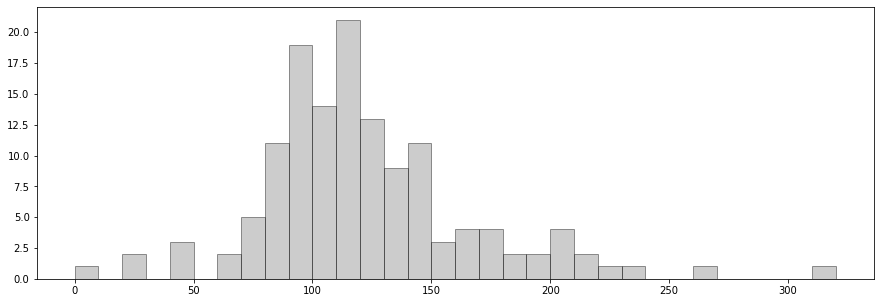

In [ ]:
plt.figure(figsize=(15, 5))  # указываем размер графика
plt.hist(df_outer['running time (min)'],
         edgecolor='black',
         color='grey',
         alpha=0.4,
         bins=range(0, 330, 10)) # сам график
plt.show() 
# видим, что больше всего фильмов с отметкой ~ 120 минут

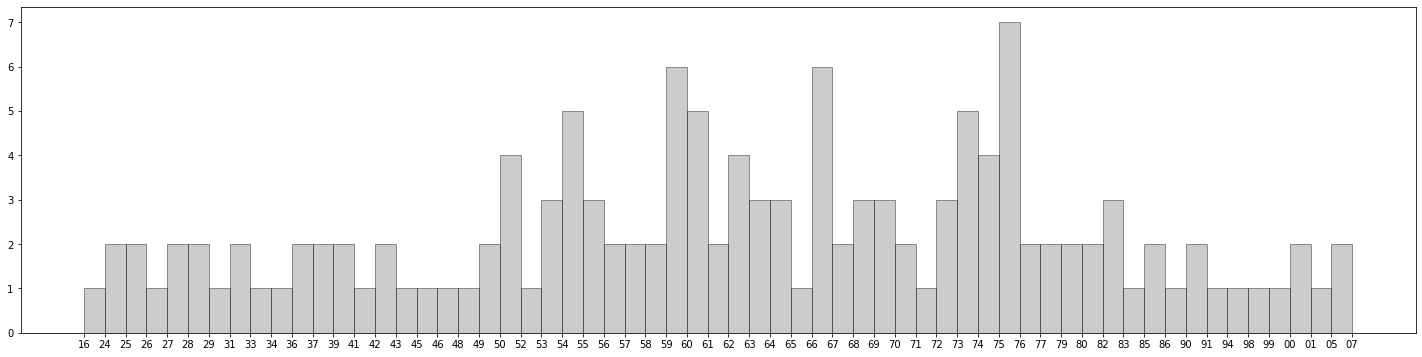

In [ ]:
a = df_outer.sort_values(['year'])['year']
b= []
for i in a:
  b+=[i.replace("19", '').replace("20", '')]
plt.figure(figsize=(25, 6))  # указываем размер графика
plt.hist(b,edgecolor='black', 
         color='grey',
         alpha=0.4,
         bins=range(0, 62)) # сам график
plt.show() 




```
Видим, что больше всего фильмов было в 75 году. Также рекордные количества вильмов были в 59 и 66 гг. (по 6 фильмов в год) и в 54 и 74(по 5 фильмов в год)
Также на графике выделяется период 1950-1975 года, когда было снято больше всего фильмов и всего 3 года, когда в список попало только по одному фильму. Также это тот период, когда часто в год было более 2-х фильмов из списка, тогда в другие периоды такого вообще ненаблюдается(за исколючением 83-го года). Также в этом периоде фильмы из списка выхлодили с наибольшей регулярностью (отсттвует только 51-й год за 25 летний период)
лет, когда выходило не более одного фильма в год, которые бы потом попали в список, или их не выходило достаточно много, порядка половины лет. Одним из наиболее заметных периодов ялвяются 43-48 ггг, когда таких фильмов или не было вовсе, или было не более одного.
```



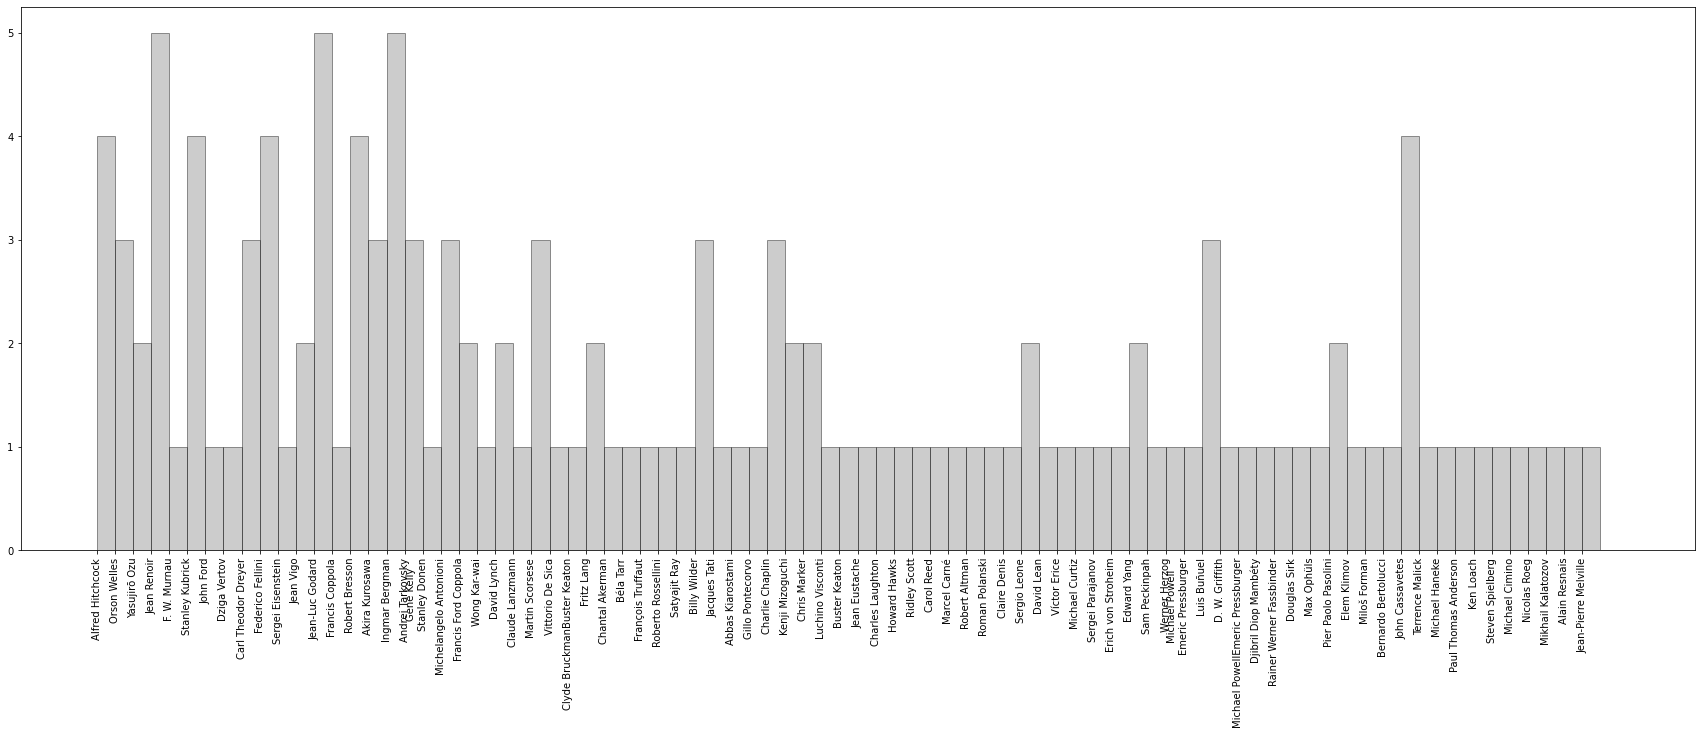

In [ ]:
plt.figure(figsize=(30, 10))  # указываем размер графика
plt.hist(df_outer["directed"],edgecolor='black', 
         color='grey',
         alpha=0.4,
         bins=range(0, 85)) # сам график
plt.xticks(rotation='vertical')
plt.show() 

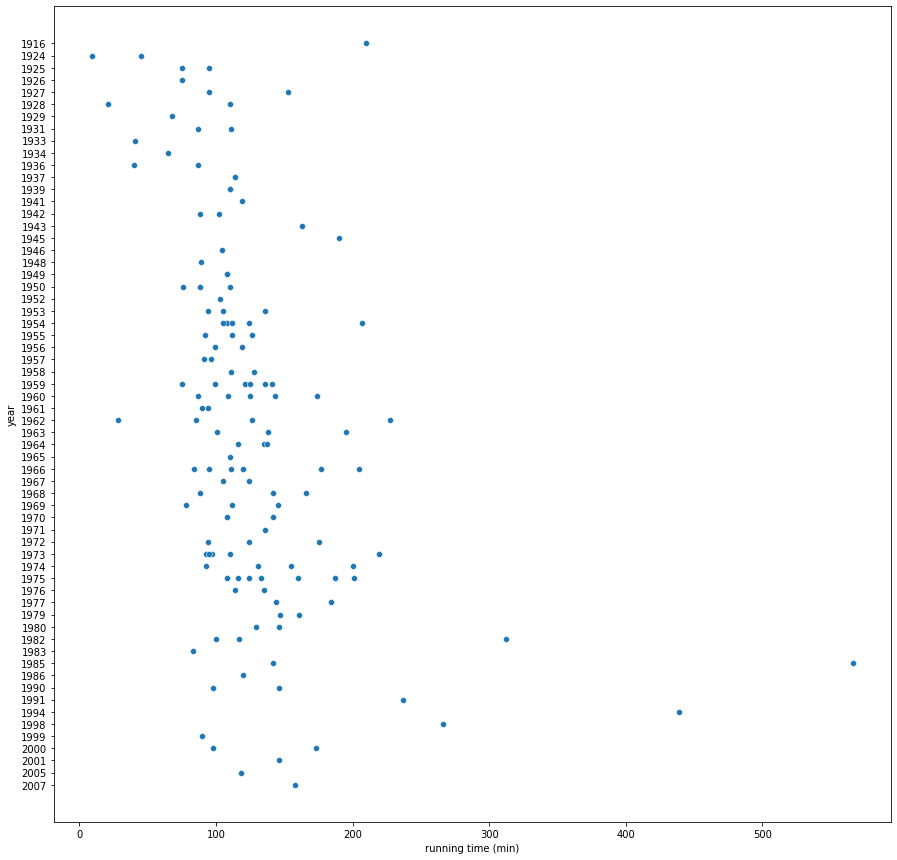

In [ ]:
plt.figure(figsize=(15, 15))  # указываем размер графика
sns.scatterplot(data=df_outer.sort_values(['year']), x='running time (min)', y='year')
plt.show()

Видим, что в целом, лдлительность фильмов сохраняется на протяжении всех лет, но аутлайеры с высолкой длительностью появляются в более современных фильмах, в то время как наиболее короткие фильмы наоборот были в первой половине 20-го века.

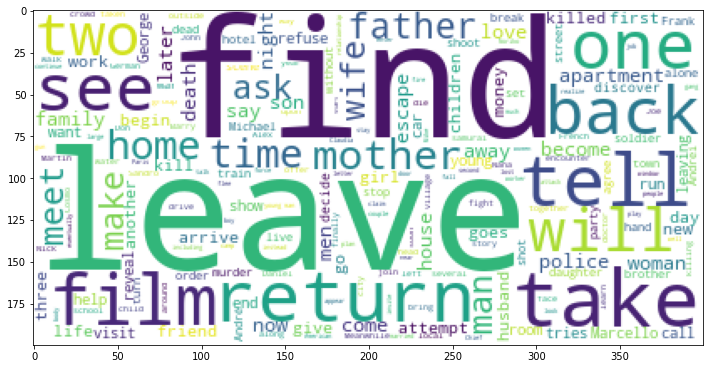

In [ ]:
text=''
for i in df_outer["plot"]:
  text+= i+' '
text
word_cloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(12, 18)) 
plt.imshow(word_cloud)
plt.show()

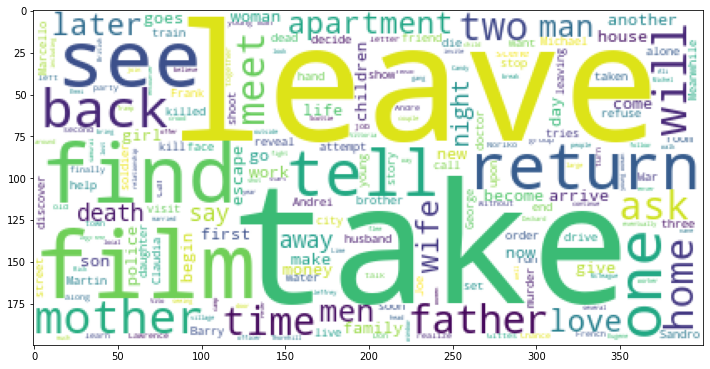

In [ ]:
text=''
for i in df_critics["plot"]:
  text+= i+' '
text
word_cloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(12, 18)) 
plt.imshow(word_cloud)
plt.show()

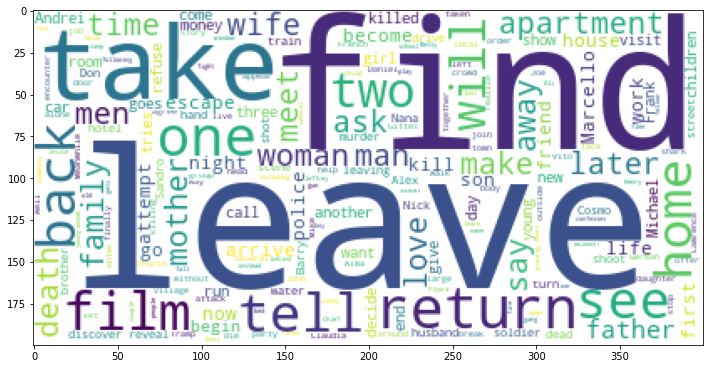

In [ ]:
text=''
for i in df_directors["plot"]:
  text+= i+' '
text
word_cloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(12, 18)) 
plt.imshow(word_cloud)
plt.show()

Видим, что "leave" и "find" больше встречается в фильмах, выбранных режиссерами, но в целом все наиболее встречающиеся слова характерны для обоих списков фильмов. На основе полученного графика мы видим, что в целом в описании обоих списков вильмов наиболее часто-встречаемыми словами "leave", "find", "return", "take" и т.д.

In [ ]:
df_outer.to_csv('file.csv')